## 1. Introduction to Logistic Regression 

    When data scientists may come across a new classification problem, the first algorithm that may come across their mind 
    is Logistic Regression. It is a supervised learning classification algorithm which is used to predict observations to 
    a discrete set of classes. Practically, it is used to classify observations into different categories. Hence,
    its output is discrete in nature. Logistic Regression is also called Logit Regression. It is one of the most 
    simple, straightforward and versatile classification algorithms which is used to solve classification problems.

## 2. Logistic Regression intuition

        In statistics, the Logistic Regression model is a widely used statistical model which is primarily 
        used for classification purposes. It means that given a set of observations, Logistic Regression algorithm 
        helps us to classify these observations into two or more discrete classes. So, the target variable is 
        discrete in nature.

    The Logistic Regression algorithm works as follows -

### Implement linear equation

    Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables 
    to predict a response value. For example, we consider the example of number of hours studied and probability 
    of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. 
    Probability of passing the exam is the response or target variable and it is denoted by z.

    If we have one explanatory variable (x1) and one response variable (z), then the linear equation 
    would be given mathematically with the following equation-
    
>#### z = β0 + β1x1

    Here, the coefficients β0 and β1 are the parameters of the model.

    If there are multiple explanatory variables, then the above equation can be extended to

>#### z = β0 + β1x1+ β2x2+……..+ βnxn

    Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

    So, the predicted response value is given by the above equations and is denoted by z.
    
#### Sigmoid Function
    This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. 
    We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then
    maps any real value into a probability value between 0 and 1.

    In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an 
    S shaped curve. It is also called sigmoid curve.

    A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

    Graphically, we can represent sigmoid function with the following graph.

### Decision boundary
    The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

    Mathematically, it can be expressed as follows:-

>#### p ≥ 0.5 => class = 1

>#### p < 0.5 => class = 0

    Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this 
    observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. 
    This is represented in the graph below-

### 3. Assumptions of Logistic Regression

        The Logistic Regression model requires several key assumptions. These are as follows:-

    1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.
    
    2. It requires the observations to be independent of each other. So, the observations should not come 
    from repeated measurements.
    
    3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. 
       It means that the independent variables should not be too highly correlated with each other.
    
    4. Logistic Regression model assumes linearity of independent variables and log odds.
    
    5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large 
       sample size to achieve the high accuracy.

### Types of Logistic Regression

    Logistic Regression model can be classified into three groups based on the target variable categories. 
    These three groups are described below:-
    
#### 1.Binary Logistic Regression
      In Binary Logistic Regression, the target variable has two possible categories. 
      The common examples of categories are yes or no, good or bad, true or false, 
      spam or no spam and pass or fail.     
#### 2. Multinomial Logistic Regression
        In Multinomial Logistic Regression, the target variable has three or more categories 
        which are not in any particular order. So, there are three or more nominal categories. 
        The examples include the type of categories of fruits - apple, mango, orange and banana.      
#### 3. Ordinal Logistic Regression
        In Ordinal Logistic Regression, the target variable has three or more ordinal categories. 
        So, there is intrinsic order involved with the categories. For example, 
        the student performance can be categorized as poor, average, good and excellent.
        

In [2]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)



# import matplotlib.pyplot as plt # data visualization
# import seaborn as sns # statistical data visualization
# %matplotlib inline


import os
print(os.listdir("C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Logistic Regression/input"))
# Any results you write to the current directory are saved as output.

['healthcare_dataset.csv']


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
Health_df  = pd.read_csv('C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Logistic Regression/Input/healthcare_dataset.csv')

In [5]:
Health_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [6]:
Health_df.shape

(10000, 15)

In [7]:
col_names = Health_df.columns
col_names

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [8]:
Health_df.info

<bound method DataFrame.info of                       Name  Age  Gender Blood Type Medical Condition  \
0          Tiffany Ramirez   81  Female         O-          Diabetes   
1              Ruben Burns   35    Male         O+            Asthma   
2                Chad Byrd   61    Male         B-           Obesity   
3        Antonio Frederick   49    Male         B-            Asthma   
4      Mrs. Brandy Flowers   51    Male         O-         Arthritis   
...                    ...  ...     ...        ...               ...   
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
0           2022-11-17     Patr

##### Types of variables
    In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of 
    categorical and numerical variables in the dataset. Categorical variables have data type object. 
    Numerical variables have data type float64.

    First of all, I will find categorical variables.

In [9]:
categorical = [var for var in Health_df.columns if Health_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 12 categorical variables

The categorical variables are : ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


#### Summary of categorical variables
    There is a 2 date variable. It is denoted by Date column.
    There are 7 categorical variables. These are given by Gender, BloodType, Medical Condition, Hosipital, 
    Insurance provider, Admission Type and Medication.
    There are two binary categorical variables - Gender
    Test Results is the target variable.

In [10]:
Health_df[categorical].isnull().sum()

Name                  0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [11]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if Health_df[var].isnull().sum()!=0]

print(Health_df[cat1].isnull().sum())

Series([], dtype: float64)


In [12]:
# view frequency of categorical variables

for var in categorical: 
    
    print(Health_df[var].value_counts())

Michael Johnson        7
James Johnson          6
Michael Miller         4
Michelle Williams      4
Scott Smith            4
                      ..
Sharon Rose            1
Stephanie Knox         1
Anthony Jones          1
Melissa Perkins DVM    1
Eric King              1
Name: Name, Length: 9378, dtype: int64
Female    5075
Male      4925
Name: Gender, dtype: int64
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64
2019-04-12    15
2022-04-27    15
2021-10-23    14
2023-03-27    14
2022-10-01    14
              ..
2022-07-16     1
2022-06-15     1
2022-12-11     1
2022-10-28     1
2019-09-23     1
Name: Date of Admission, Length: 1815, dtype: int64
Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennife

In [13]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(Health_df[var].value_counts()/np.int64(len(Health_df)))

Michael Johnson        0.0007
James Johnson          0.0006
Michael Miller         0.0004
Michelle Williams      0.0004
Scott Smith            0.0004
                        ...  
Sharon Rose            0.0001
Stephanie Knox         0.0001
Anthony Jones          0.0001
Melissa Perkins DVM    0.0001
Eric King              0.0001
Name: Name, Length: 9378, dtype: float64
Female    0.5075
Male      0.4925
Name: Gender, dtype: float64
AB-    0.1275
AB+    0.1258
B-     0.1252
O+     0.1248
O-     0.1244
B+     0.1244
A+     0.1241
A-     0.1238
Name: Blood Type, dtype: float64
Asthma          0.1708
Cancer          0.1703
Hypertension    0.1688
Arthritis       0.1650
Obesity         0.1628
Diabetes        0.1623
Name: Medical Condition, dtype: float64
2019-04-12    0.0015
2022-04-27    0.0015
2021-10-23    0.0014
2023-03-27    0.0014
2022-10-01    0.0014
               ...  
2022-07-16    0.0001
2022-06-15    0.0001
2022-12-11    0.0001
2022-10-28    0.0001
2019-09-23    0.0001
Name: Date o

In [14]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(Health_df[var].unique()), ' labels')
    
print("*"*25)
print("We can see that there is a Date variable which needs to be preprocessed.") 
print("I will do preprocessing in the following section.")
print("All the other variables contain relatively smaller number of variables.")
print("*"*25)

Name  contains  9378  labels
Gender  contains  2  labels
Blood Type  contains  8  labels
Medical Condition  contains  6  labels
Date of Admission  contains  1815  labels
Doctor  contains  9416  labels
Hospital  contains  8639  labels
Insurance Provider  contains  5  labels
Admission Type  contains  3  labels
Discharge Date  contains  1834  labels
Medication  contains  5  labels
Test Results  contains  3  labels
*************************
We can see that there is a Date variable which needs to be preprocessed.
I will do preprocessing in the following section.
All the other variables contain relatively smaller number of variables.
*************************


#### Feature Engineering of Date Variable

In [15]:
Health_df['Date of Admission'].dtypes

dtype('O')

In [16]:
# parse the dates, currently coded as strings, into datetime format

Health_df['Date of Admission'] = pd.to_datetime(Health_df['Date of Admission'])
Health_df['Discharge Date'] = pd.to_datetime(Health_df['Discharge Date'])

In [17]:
# extract year from date

Health_df['Admission_Year'] = Health_df['Date of Admission'].dt.year

Health_df['Admission_Year'].head()

0    2022
1    2023
2    2019
3    2020
4    2021
Name: Admission_Year, dtype: int64

In [18]:
# extract year from date

Health_df['Discharge_Year'] = Health_df['Discharge Date'].dt.year

Health_df['Discharge_Year'].head()

0    2022
1    2023
2    2019
3    2020
4    2021
Name: Discharge_Year, dtype: int64

In [19]:
# extract month from date

Health_df['Admission_Month'] = Health_df['Date of Admission'].dt.month
Health_df['Discharge_Month'] = Health_df['Discharge Date'].dt.month

Health_df['Admission_Month'].head()
Health_df['Discharge_Month'].head()

0    12
1     6
2     2
3     5
4     8
Name: Discharge_Month, dtype: int64

In [20]:
# extract day from date

Health_df['Admission_day'] = Health_df['Date of Admission'].dt.day
Health_df['Discharge_day'] = Health_df['Discharge Date'].dt.day

Health_df['Admission_day'].head()
Health_df['Discharge_day'].head()

0     1
1    15
2     8
3     3
4     2
Name: Discharge_day, dtype: int64

In [21]:
Health_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Admission_Year,Discharge_Year,Admission_Month,Discharge_Month,Admission_day,Discharge_day
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,...,Elective,2022-12-01,Aspirin,Inconclusive,2022,2022,11,12,17,1
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,...,Emergency,2023-06-15,Lipitor,Normal,2023,2023,6,6,1,15
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,...,Emergency,2019-02-08,Lipitor,Normal,2019,2019,1,2,9,8
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,...,Urgent,2020-05-03,Penicillin,Abnormal,2020,2020,5,5,2,3
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,...,Urgent,2021-08-02,Paracetamol,Normal,2021,2021,7,8,9,2


In [22]:
# drop the original Date variable

Health_df.drop('Date of Admission', axis=1, inplace = True)

Health_df.drop('Discharge Date', axis=1, inplace = True)

In [23]:
Health_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission_Year,Discharge_Year,Admission_Month,Discharge_Month,Admission_day,Discharge_day
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,2022,2022,11,12,17,1
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,2023,2023,6,6,1,15
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,2019,2019,1,2,9,8
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,2020,2020,5,5,2,3
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,2021,2021,7,8,9,2


##### Explore Categorical Variables
    Now, I will explore the categorical variables one by one.

In [24]:
# find categorical variables

categorical = [var for var in Health_df.columns if Health_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [25]:
Health_df.rename(columns = {'Medical Condition':'Medical_Condition'}, inplace = True)
Health_df.rename(columns = {'Insurance Provider':'Insurance_Provider'}, inplace = True)
Health_df.rename(columns = {'Admission Type':'Admission_Type'}, inplace = True)
Health_df.rename(columns = {'Test Results':'Test_Results'}, inplace = True)
Health_df.rename(columns = {'Blood Type':'Blood_Type'}, inplace = True)

In [26]:
# print number of labels in Medical Condition variable

print('Medical Condition', len(Health_df.Medical_Condition.unique()), 'labels')

Medical Condition 6 labels


In [27]:
Health_df.Medical_Condition.unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [28]:
Health_df.Medical_Condition.value_counts()

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical_Condition, dtype: int64

In [29]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(Health_df.Medical_Condition, drop_first=True).head()

,Asthma,Cancer,Diabetes,Hypertension,Obesity
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,0


In [30]:
print('Insurance Provider details ', len(Health_df.Insurance_Provider.unique()), 'labels')

Insurance Provider details  5 labels


In [31]:
# check labels in WindGustDir variable

Health_df['Insurance_Provider'].unique()

array(['Medicare', 'UnitedHealthcare', 'Aetna', 'Cigna', 'Blue Cross'],
      dtype=object)

In [32]:
Health_df.Insurance_Provider.value_counts()

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance_Provider, dtype: int64

In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(Health_df.Insurance_Provider, drop_first=True, dummy_na=True).head()

,Blue Cross,Cigna,Medicare,UnitedHealthcare,NaN
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [34]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(Health_df.Insurance_Provider, drop_first=True, dummy_na=True).sum(axis=0)

Blue Cross          2032
Cigna               2040
Medicare            1925
UnitedHealthcare    1978
NaN                    0
dtype: int64

In [35]:
Health_df['Medication'].unique()

array(['Aspirin', 'Lipitor', 'Penicillin', 'Paracetamol', 'Ibuprofen'],
      dtype=object)

In [36]:
Health_df['Admission_Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [37]:
Health_df['Blood_Type'].unique()

array(['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+'], dtype=object)

In [38]:
# find numerical variables

numerical = [var for var in Health_df.columns if Health_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Age', 'Billing Amount', 'Room Number', 'Admission_Year', 'Discharge_Year', 'Admission_Month', 'Discharge_Month', 'Admission_day', 'Discharge_day']


In [39]:
# view the numerical variables

Health_df[numerical].head()

,Age,Billing Amount,Room Number,Admission_Year,Discharge_Year,Admission_Month,Discharge_Month,Admission_day,Discharge_day
0,81,37490.983364,146,2022,2022,11,12,17,1
1,35,47304.064845,404,2023,2023,6,6,1,15
2,61,36874.896997,292,2019,2019,1,2,9,8
3,49,23303.322092,480,2020,2020,5,5,2,3
4,51,18086.344184,477,2021,2021,7,8,9,2


In [40]:
# view summary statistics in numerical variables

print(round(Health_df[numerical].describe()),2)

           Age  Billing Amount  Room Number  Admission_Year  Discharge_Year  \
count  10000.0         10000.0      10000.0         10000.0         10000.0   
mean      51.0         25517.0        300.0          2021.0          2021.0   
std       20.0         14067.0        116.0             1.0             1.0   
min       18.0          1000.0        101.0          2018.0          2018.0   
25%       35.0         13507.0        199.0          2020.0          2020.0   
50%       52.0         25258.0        299.0          2021.0          2021.0   
75%       68.0         37734.0        400.0          2022.0          2022.0   
max       85.0         49996.0        500.0          2023.0          2023.0   

       Admission_Month  Discharge_Month  Admission_day  Discharge_day  
count          10000.0          10000.0        10000.0        10000.0  
mean               7.0              7.0           16.0           16.0  
std                3.0              3.0            9.0            9.0  


Text(0, 0.5, 'Billing Amount')

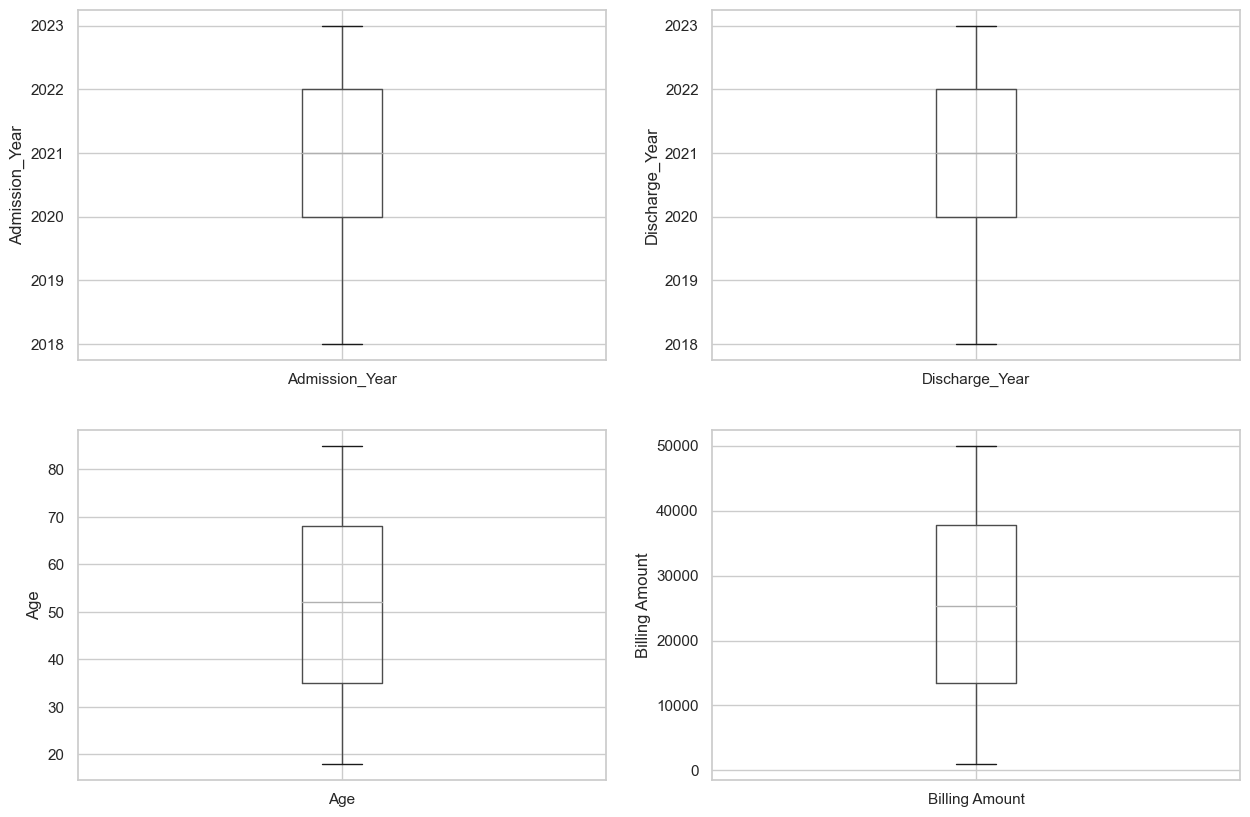

In [41]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = Health_df.boxplot(column='Admission_Year')
fig.set_title('')
fig.set_ylabel('Admission_Year')


plt.subplot(2, 2, 2)
fig = Health_df.boxplot(column='Discharge_Year')
fig.set_title('')
fig.set_ylabel('Discharge_Year')


plt.subplot(2, 2, 3)
fig = Health_df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 4)
fig = Health_df.boxplot(column='Billing Amount')
fig.set_title('')
fig.set_ylabel('Billing Amount')

Text(0, 0.5, 'Test_Results')

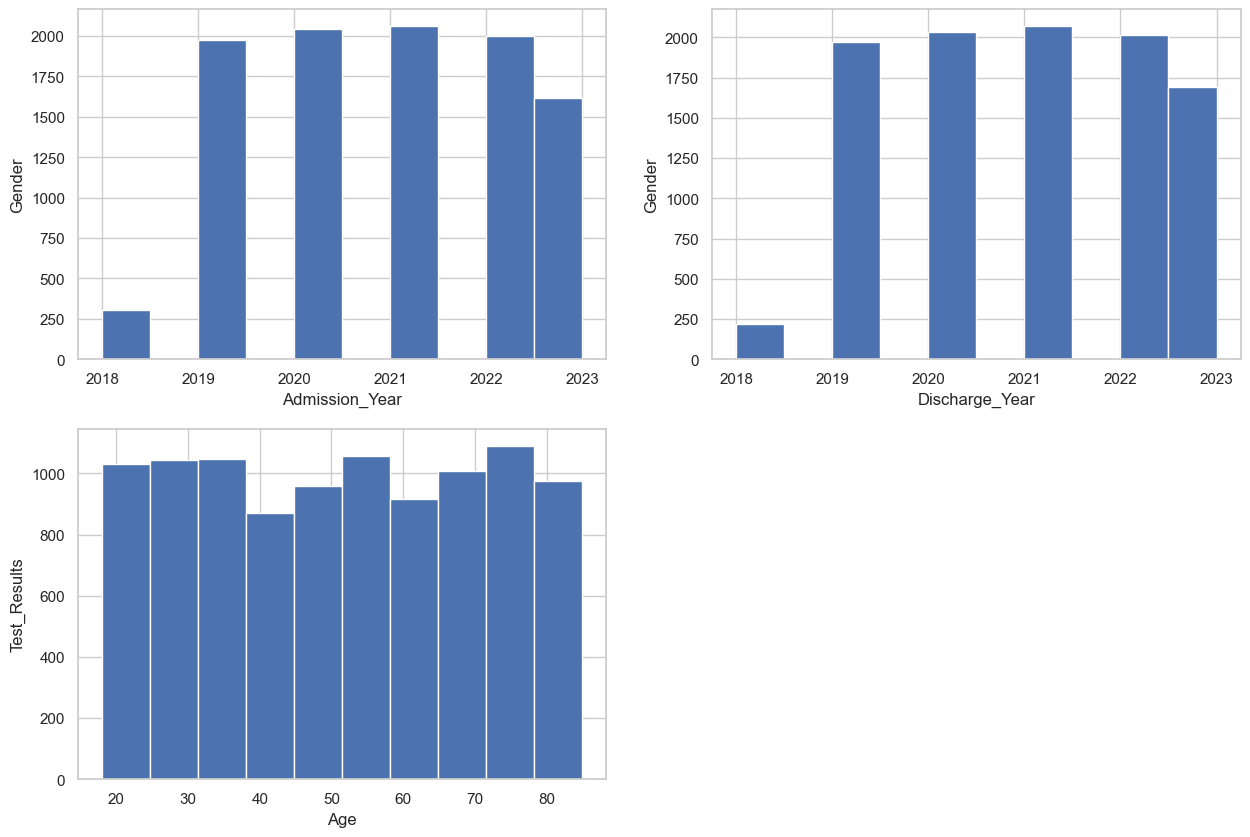

In [42]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = Health_df.Admission_Year.hist(bins=10)
fig.set_xlabel('Admission_Year')
fig.set_ylabel('Gender')

plt.subplot(2, 2, 2)
fig = Health_df.Discharge_Year.hist(bins=10)
fig.set_xlabel('Discharge_Year')
fig.set_ylabel('Gender')


plt.subplot(2, 2, 3)
fig = Health_df.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Test_Results')

In [43]:
# find outliers for variable

IQR = Health_df.Age.quantile(0.75) - Health_df.Age.quantile(0.25)
Lower_fence = Health_df.Age.quantile(0.25) - (IQR * 3)
Upper_fence = Health_df.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -64.0 or > 167.0


In [44]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((Health_df['Age'].isnull().sum()/Health_df.shape[0])*100))

Percent of missing "Age" records is 0.00%


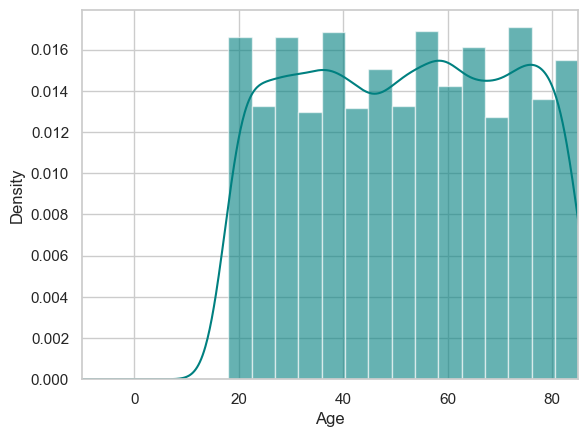

In [45]:
ax = Health_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Health_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [46]:
print('The mean of "Age" is %.2f' %(Health_df["Age"].mean(skipna=True)))

The mean of "Age" is 51.45


In [47]:
print('The mean of "Age" is %.2f' %(Health_df["Age"].median(skipna=True)))

The mean of "Age" is 52.00


Patients grouped by Blood group (O-, O+, B-, AB+, A+, AB-, A-, B+):
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood_Type, dtype: int64


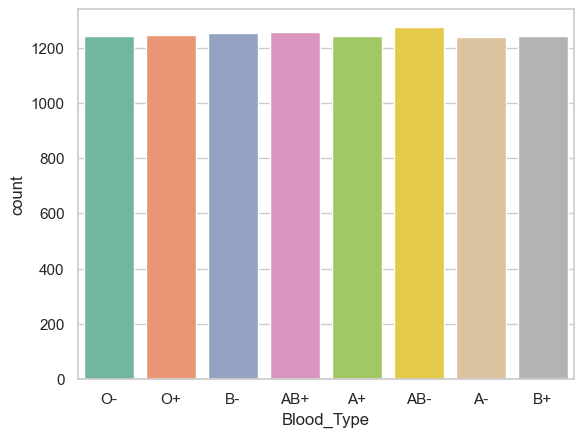

In [48]:
print('Patients grouped by Blood group (O-, O+, B-, AB+, A+, AB-, A-, B+):')
print(Health_df['Blood_Type'].value_counts())
sns.countplot(x='Blood_Type', data=Health_df, palette='Set2')
plt.show()

Patients grouped by Medical Condition (Diabetes, Asthma, Obesity, Arthritis, Hypertension, Cancer):
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical_Condition, dtype: int64


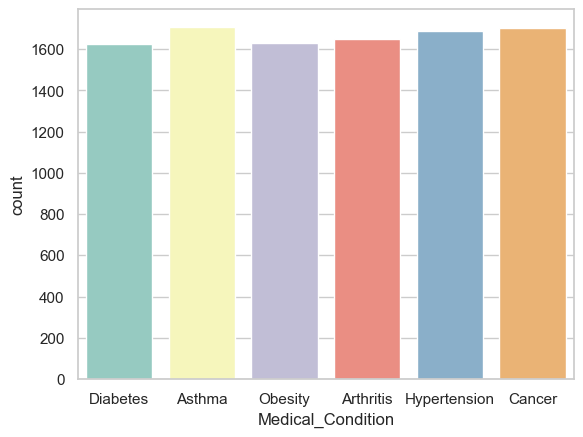

In [49]:
print('Patients grouped by Medical Condition (Diabetes, Asthma, Obesity, Arthritis, Hypertension, Cancer):')
print(Health_df['Medical_Condition'].value_counts())
sns.countplot(x='Medical_Condition', data=Health_df, palette='Set3')
plt.show()

In [50]:
print('The most common Blood_Type is %s.' %Health_df['Blood_Type'].value_counts().idxmax())

The most common Blood_Type is AB-.


In [86]:
Health_df['Results'] = np.where(Health_df['Test_Results']  =='Normal', 1,0 )

In [87]:
Health_df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Doctor,Hospital,Insurance_Provider,Billing Amount,Room Number,Admission_Type,Medication,Test_Results,Admission_Year,Discharge_Year,Admission_Month,Discharge_Month,Admission_day,Discharge_day,Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,2022,2022,11,12,17,1,0
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,2023,2023,6,6,1,15,1
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,2019,2019,1,2,9,8,1
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,2020,2020,5,5,2,3,0
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,2021,2021,7,8,9,2,1


In [89]:
health_data = Health_df.copy()
health_data["Age"].fillna(Health_df["Age"].median(skipna=True), inplace=True)
health_data["Gender"].fillna(Health_df['Gender'].value_counts().idxmax(), inplace=True)
#train_data.drop('Cabin', axis=1, inplace=True)

In [90]:
health_data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing Amount        0
Room Number           0
Admission_Type        0
Medication            0
Test_Results          0
Admission_Year        0
Discharge_Year        0
Admission_Month       0
Discharge_Month       0
Admission_day         0
Discharge_day         0
Results               0
dtype: int64

In [91]:
health_data.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Doctor,Hospital,Insurance_Provider,Billing Amount,Room Number,Admission_Type,Medication,Test_Results,Admission_Year,Discharge_Year,Admission_Month,Discharge_Month,Admission_day,Discharge_day,Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,2022,2022,11,12,17,1,0
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,2023,2023,6,6,1,15,1
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,2019,2019,1,2,9,8,1
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,2020,2020,5,5,2,3,0
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,2021,2021,7,8,9,2,1


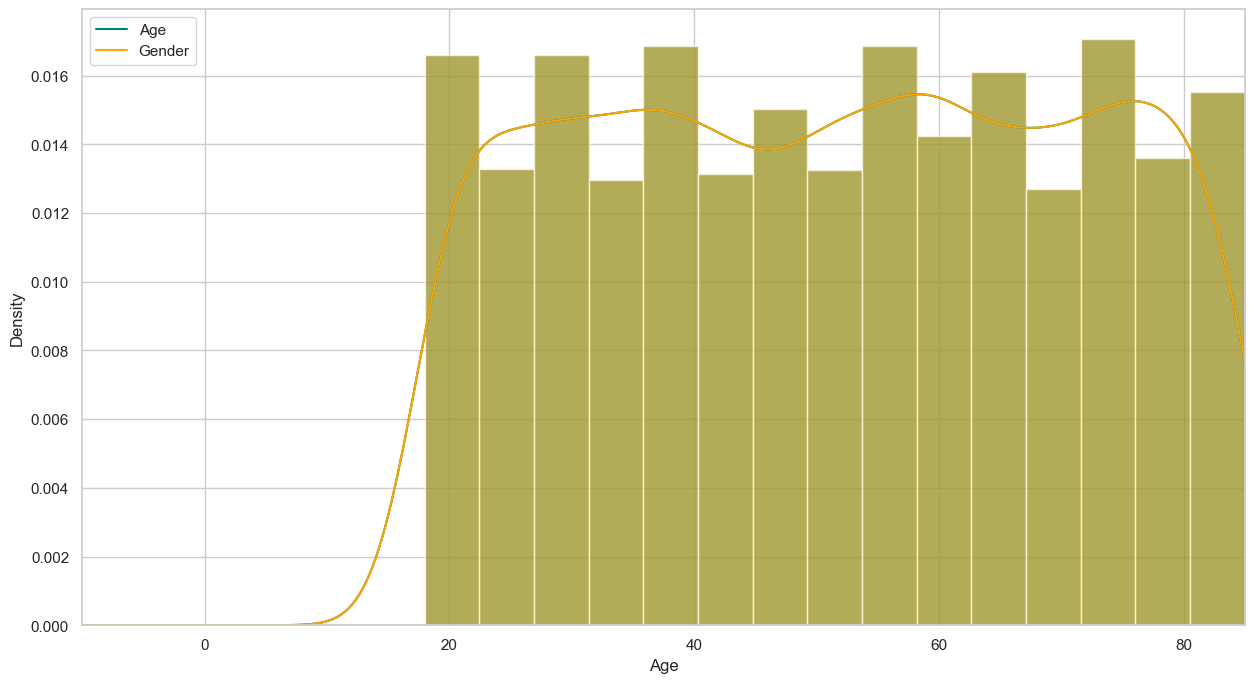

In [92]:
plt.figure(figsize=(15,8))
ax = Health_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Health_df["Age"].plot(kind='density', color='teal')
ax = health_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
health_data["Age"].plot(kind='density', color='orange')
ax.legend(['Age', 'Gender'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [94]:
Health=pd.get_dummies(health_data, columns=["Medical_Condition","Blood_Type","Gender"])
Health.head()
                        

,Name,Age,Doctor,Hospital,Insurance_Provider,Billing Amount,Room Number,Admission_Type,Medication,Test_Results,...,Blood_Type_A+,Blood_Type_A-,Blood_Type_AB+,Blood_Type_AB-,Blood_Type_B+,Blood_Type_B-,Blood_Type_O+,Blood_Type_O-,Gender_Female,Gender_Male
0,Tiffany Ramirez,81,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,...,0,0,0,0,0,0,0,1,1,0
1,Ruben Burns,35,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,...,0,0,0,0,0,0,1,0,0,1
2,Chad Byrd,61,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,...,0,0,0,0,0,1,0,0,0,1
3,Antonio Frederick,49,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,...,0,0,0,0,0,1,0,0,0,1
4,Mrs. Brandy Flowers,51,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,...,0,0,0,0,0,0,0,1,0,1


In [95]:
final_health = Health
final_health.head()


,Name,Age,Doctor,Hospital,Insurance_Provider,Billing Amount,Room Number,Admission_Type,Medication,Test_Results,...,Blood_Type_A+,Blood_Type_A-,Blood_Type_AB+,Blood_Type_AB-,Blood_Type_B+,Blood_Type_B-,Blood_Type_O+,Blood_Type_O-,Gender_Female,Gender_Male
0,Tiffany Ramirez,81,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,...,0,0,0,0,0,0,0,1,1,0
1,Ruben Burns,35,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,...,0,0,0,0,0,0,1,0,0,1
2,Chad Byrd,61,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,...,0,0,0,0,0,1,0,0,0,1
3,Antonio Frederick,49,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,...,0,0,0,0,0,1,0,0,0,1
4,Mrs. Brandy Flowers,51,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,...,0,0,0,0,0,0,0,1,0,1


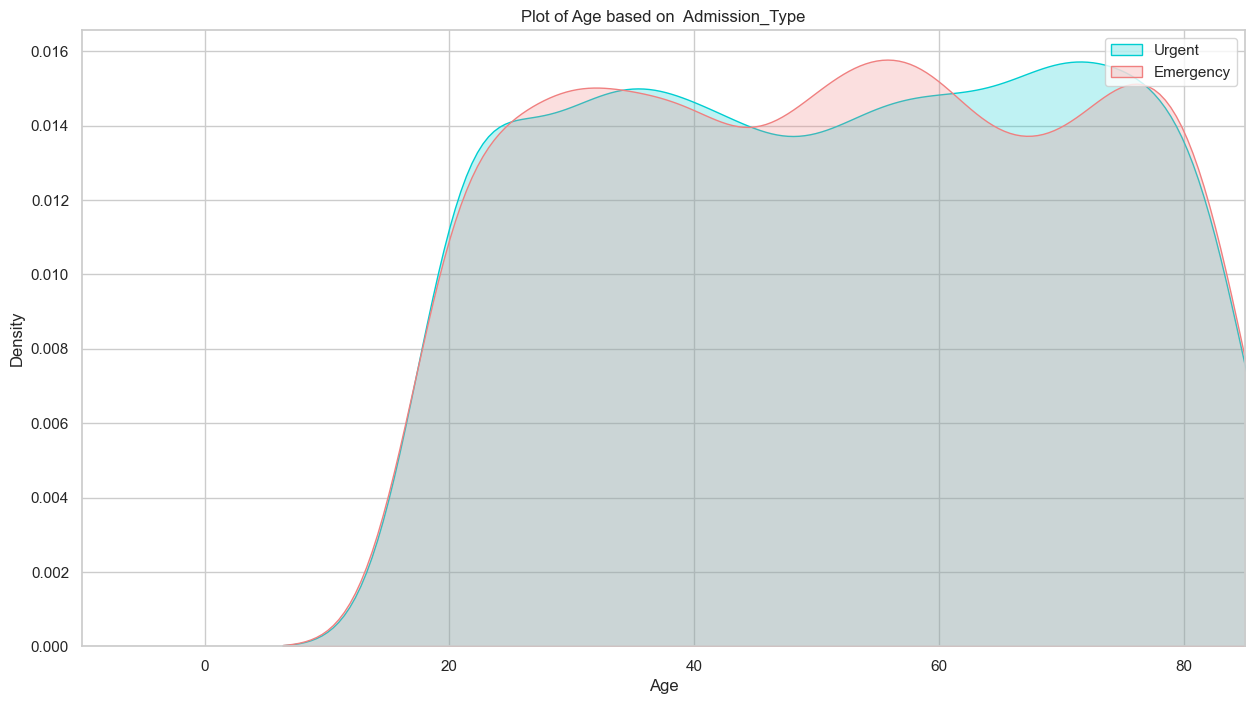

In [96]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_health["Age"][final_health.Admission_Type == 'Urgent'], color="darkturquoise", shade=True)
sns.kdeplot(final_health["Age"][final_health.Admission_Type == 'Emergency'], color="lightcoral", shade=True)
plt.legend(['Urgent', 'Emergency'])
plt.title('Plot of Age based on  Admission_Type')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

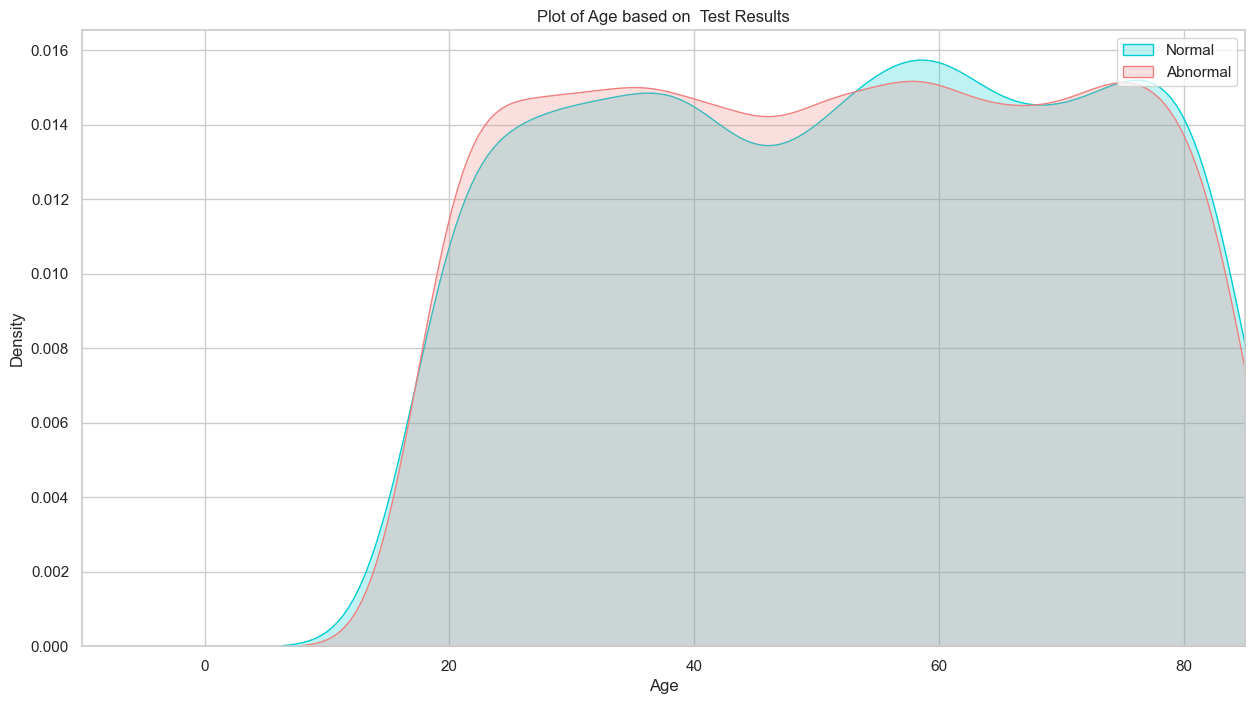

In [100]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_health["Age"][final_health.Results == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_health["Age"][final_health.Results == 0], color="lightcoral", shade=True)
plt.legend(['Normal', 'Abnormal'])
plt.title('Plot of Age based on  Test Results')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

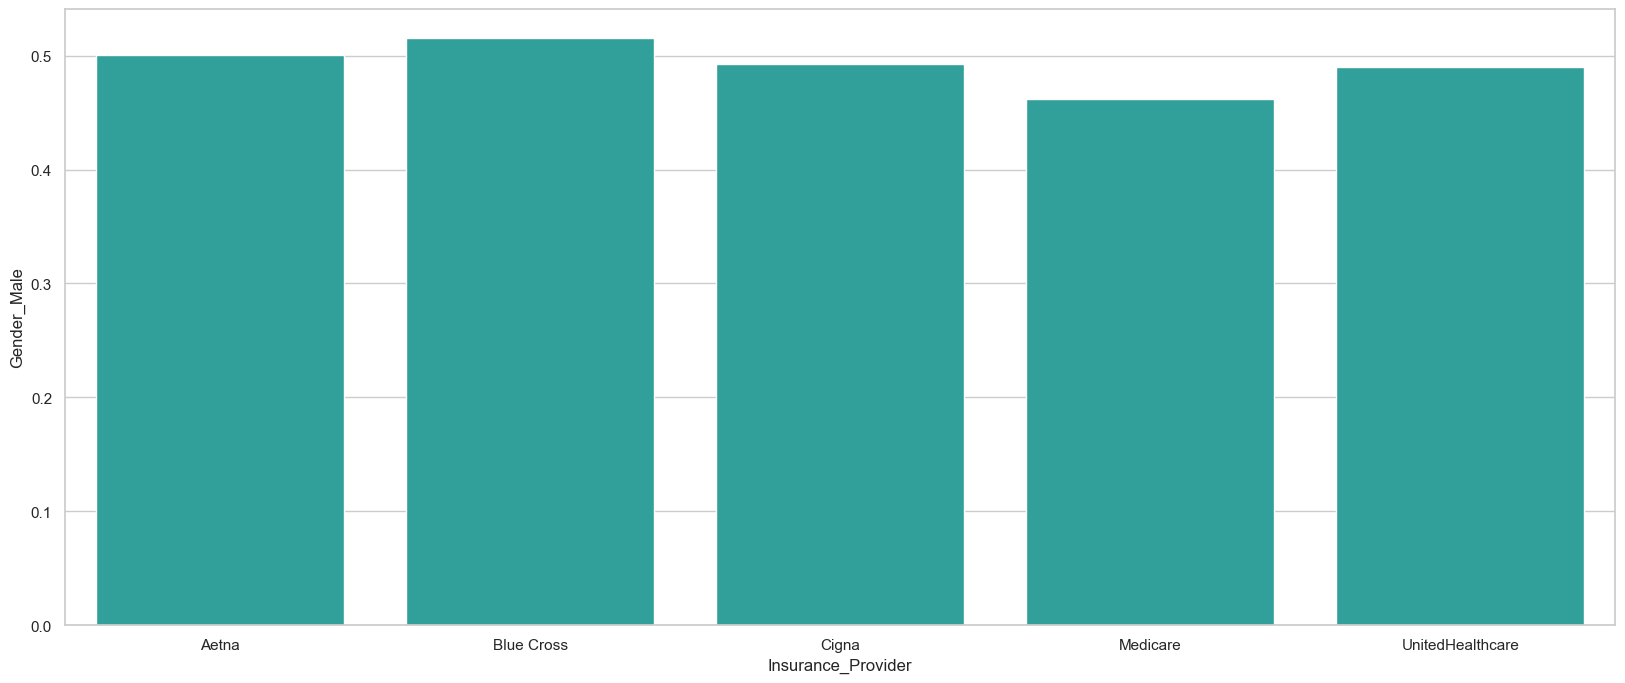

In [101]:
plt.figure(figsize=(20,8))
avg_Insurance_bymale = final_health[["Insurance_Provider", "Gender_Male"]].groupby(['Insurance_Provider'], as_index=False).mean()
g = sns.barplot(x='Insurance_Provider', y='Gender_Male', data=avg_Insurance_bymale, color="LightSeaGreen")
plt.show()

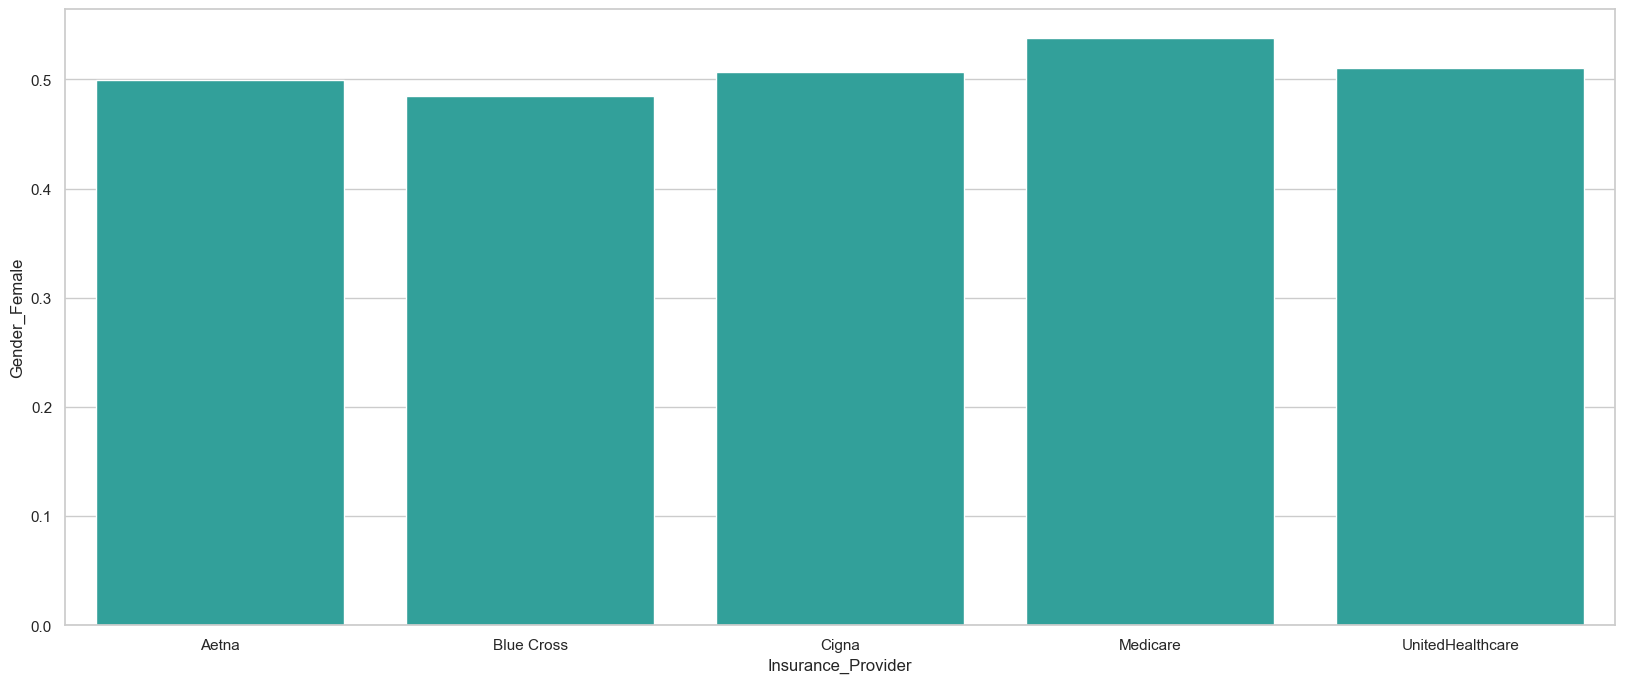

In [102]:
plt.figure(figsize=(20,8))
avg_Insurance_byfemale = final_health[["Insurance_Provider", "Gender_Female"]].groupby(['Insurance_Provider'], as_index=False).mean()
g = sns.barplot(x='Insurance_Provider', y='Gender_Female', data=avg_Insurance_byfemale, color="LightSeaGreen")
plt.show()

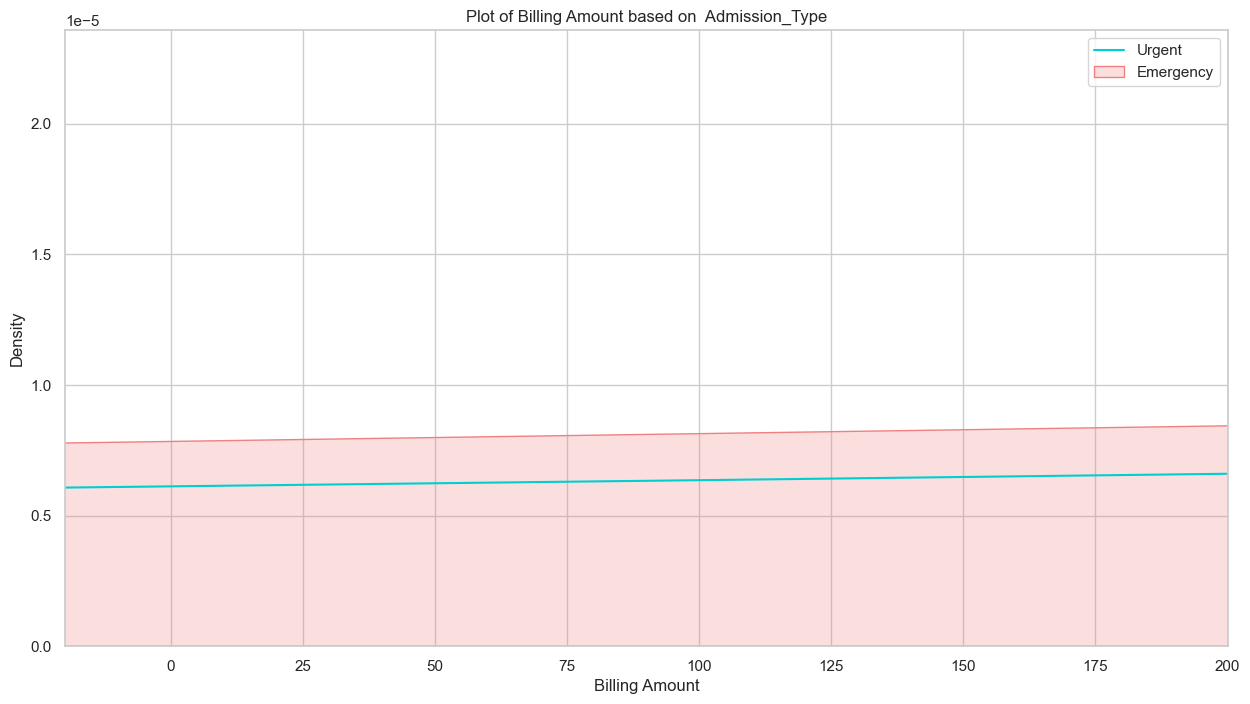

In [103]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_health["Billing Amount"][final_health.Admission_Type == 'Urgent'], color="darkturquoise", shade=False)
sns.kdeplot(final_health["Billing Amount"][final_health.Admission_Type == 'Emergency'], color="lightcoral", shade=True)
plt.legend(['Urgent', 'Emergency'])
plt.title('Plot of Billing Amount based on  Admission_Type')
ax.set(xlabel='Billing Amount')
plt.xlim(-20,200)
plt.show()

### 4. Logistic Regression and Results

#### 1.Recursive feature elimination
    Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to 
    select features by recursively considering smaller and smaller sets of features. First, the estimator 
    is trained on the initial set of features and the importance of each feature is obtained either 
    through a coef_ attribute or through a feature_importances_ attribute. Then, the least important 
    features are pruned from current set of features.That procedure is recursively repeated on the 
    pruned set until the desired number of features to select is eventually reached.

    References:
    http://scikit-learn.org/stable/modules/feature_selection.html


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Billing Amount","Blood_Type_A+","Blood_Type_A-","Blood_Type_AB+", "Blood_Type_AB-","Blood_Type_B+","Blood_Type_B-","Blood_Type_O+","Blood_Type_O-","Gender_Female","Gender_Male"]
X = final_health[cols]
y = final_health['Results']

In [105]:
# Build a logreg and compute the feature importances
model = LogisticRegression()

In [106]:
# create the RFE model and select 8 attributes
rfe = RFE(model, step = 20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Blood_Type_AB+', 'Blood_Type_AB-', 'Blood_Type_B+', 'Gender_Female', 'Gender_Male']


#### Feature ranking with recursive feature elimination and cross-validation
    RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. 
    Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the 
    number of features selected with cross-validation.

In [107]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=20, scoring='accuracy')
rfecv.fit(X, y)



RFECV(cv=20, estimator=LogisticRegression(), scoring='accuracy')

In [108]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 1
Selected features: ['Blood_Type_A+']


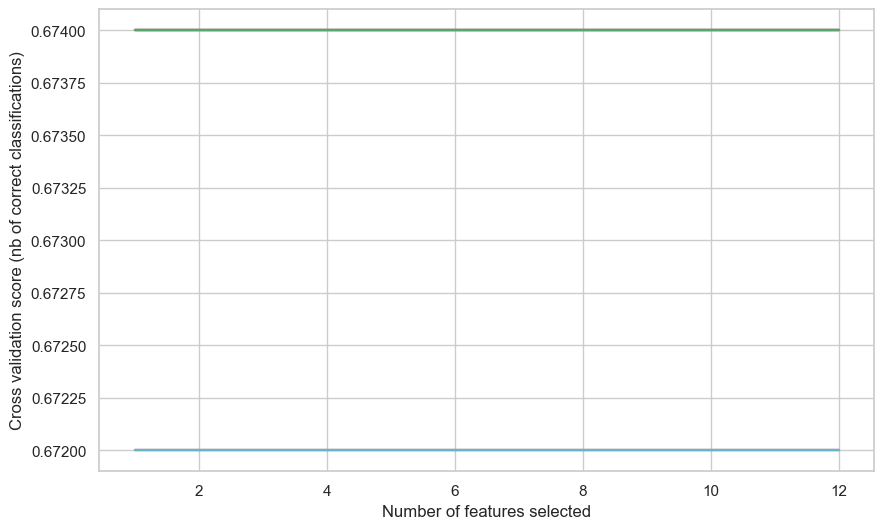

In [109]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

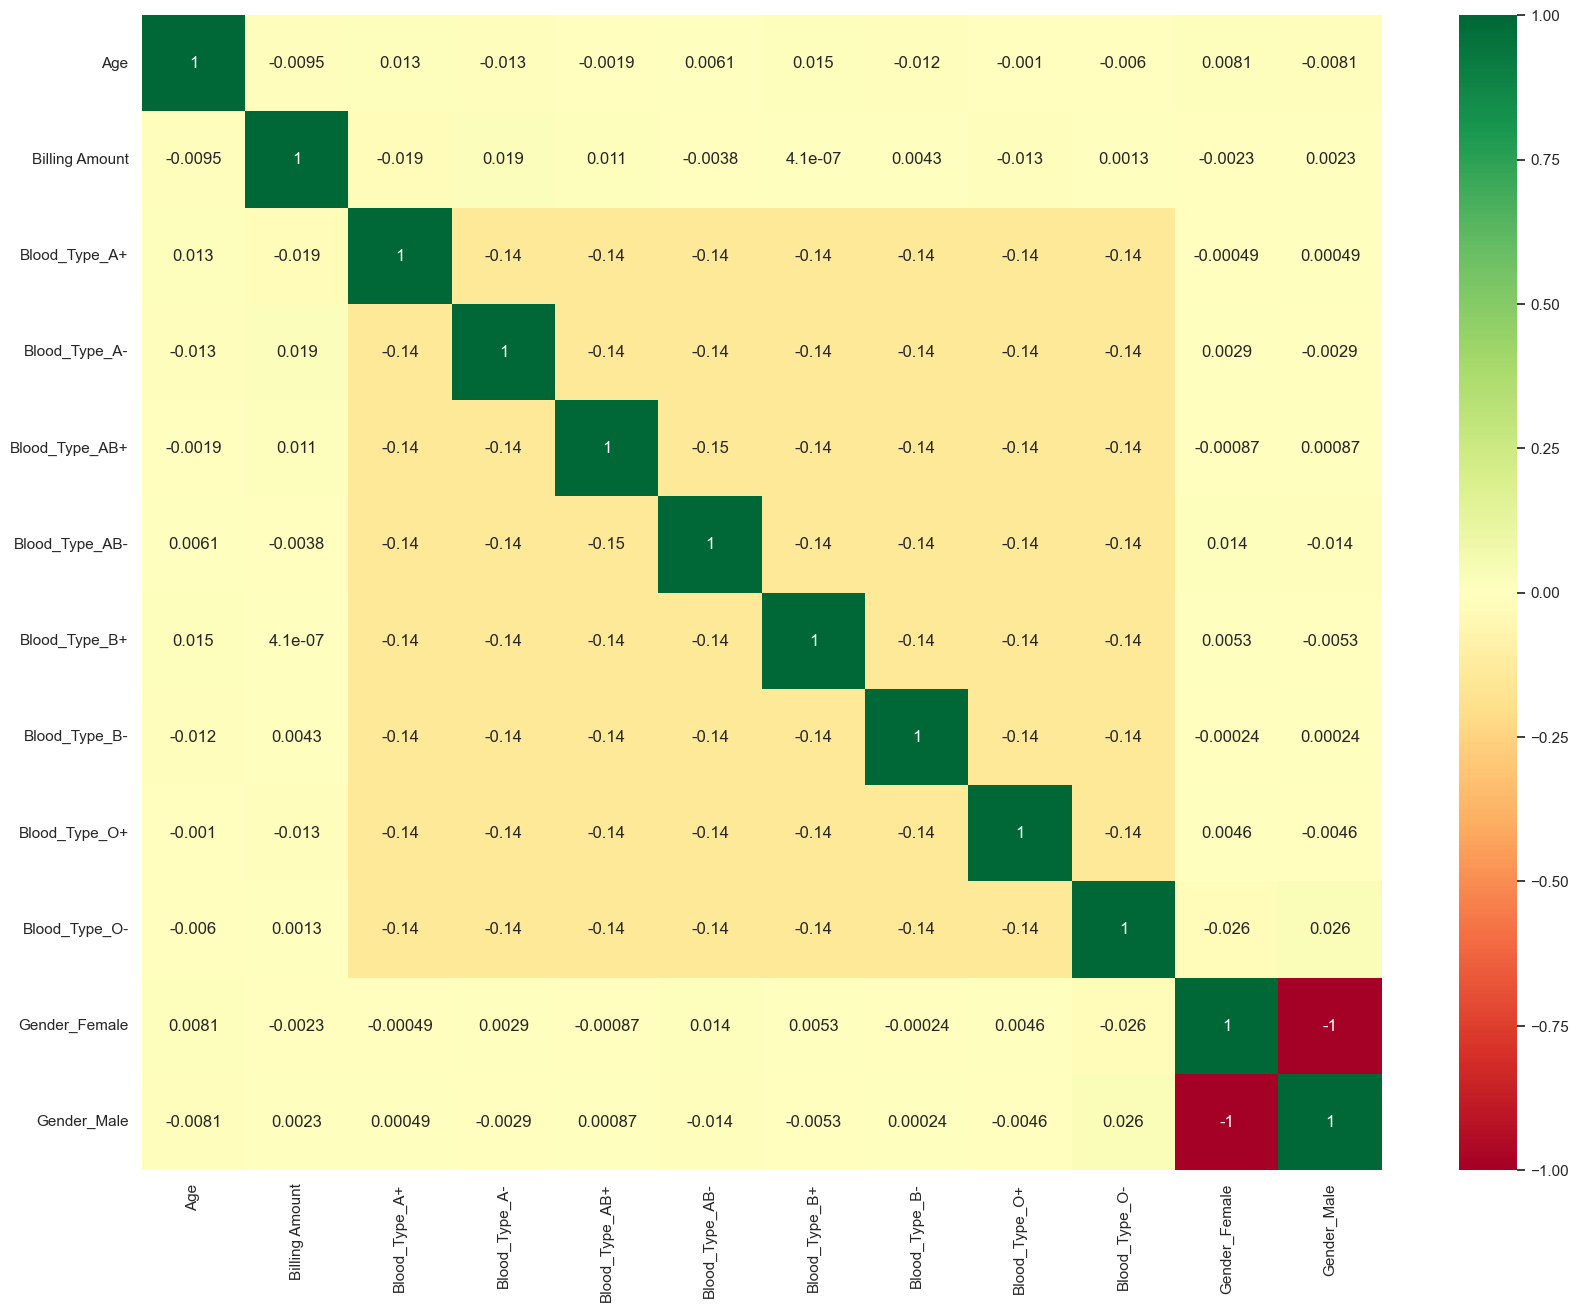

In [110]:
Selected_features = ["Age","Billing Amount","Blood_Type_A+","Blood_Type_A-","Blood_Type_AB+", "Blood_Type_AB-","Blood_Type_B+",
                     "Blood_Type_B-","Blood_Type_O+","Blood_Type_O-","Gender_Female","Gender_Male"]
X = final_health[Selected_features]

plt.subplots(figsize=(20, 15))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Model evaluation based on simple train/test split using

In [111]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_health[Selected_features]
y = final_health['Results']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [112]:
# check classification scores of logistic regression
logreg = LogisticRegression()

In [113]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_pred = logreg.predict(X_test)

In [127]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [128]:
# [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba, pos_label='your_label')
fprate, tprate, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

In [138]:
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fprate, tprate))
idx = np.min(np.where(tprate > 0.70)) # index of the first threshold for which the sensibility > 0.95


Train/Test split results:
LogisticRegression accuracy is 0.668
LogisticRegression log_loss is 0.640
LogisticRegression auc is 0.500


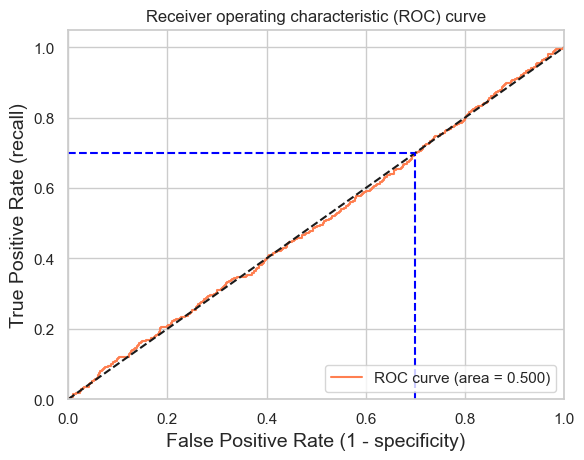

Using a threshold of 0.314 guarantees a sensitivity of 0.700 and a specificity of 0.301, i.e. a false positive rate of 69.91%.


In [139]:
plt.figure()
plt.plot(fprate, tprate, color='coral', label='ROC curve (area = %0.3f)' % auc(fprate, tprate))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fprate[idx]], [tprate[idx],tprate[idx]], 'k--', color='blue')
plt.plot([fprate[idx],fprate[idx]], [0,tprate[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thresholds[idx] + "guarantees a sensitivity of %.3f " % tprate[idx] +  
      "and a specificity of %.3f" % (1-fprate[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fprate[idx])*100))

In [140]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.673
LogisticRegression average log_loss is 0.637
LogisticRegression average auc is 0.496


In [141]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.673 (+/-0.000)
LogisticRegression average log_loss: 0.637 (+/-0.004)
LogisticRegression average auc: 0.496 (+/-0.024)


In [143]:
cols = ["Age","Billing Amount","Blood_Type_A+","Blood_Type_A-","Blood_Type_AB+", "Blood_Type_AB-","Blood_Type_B+","Blood_Type_B-","Blood_Type_O+","Blood_Type_O-","Gender_Female","Gender_Male"]
X = final_health[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_health[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.673 (+/-0.000)
LogisticRegression average log_loss: 0.637 (+/-0.004)
LogisticRegression average auc: 0.496 (+/-0.024)


best params: LogisticRegression(C=1e-05)
best params: {'C': 1e-05}
best score: 0.6733


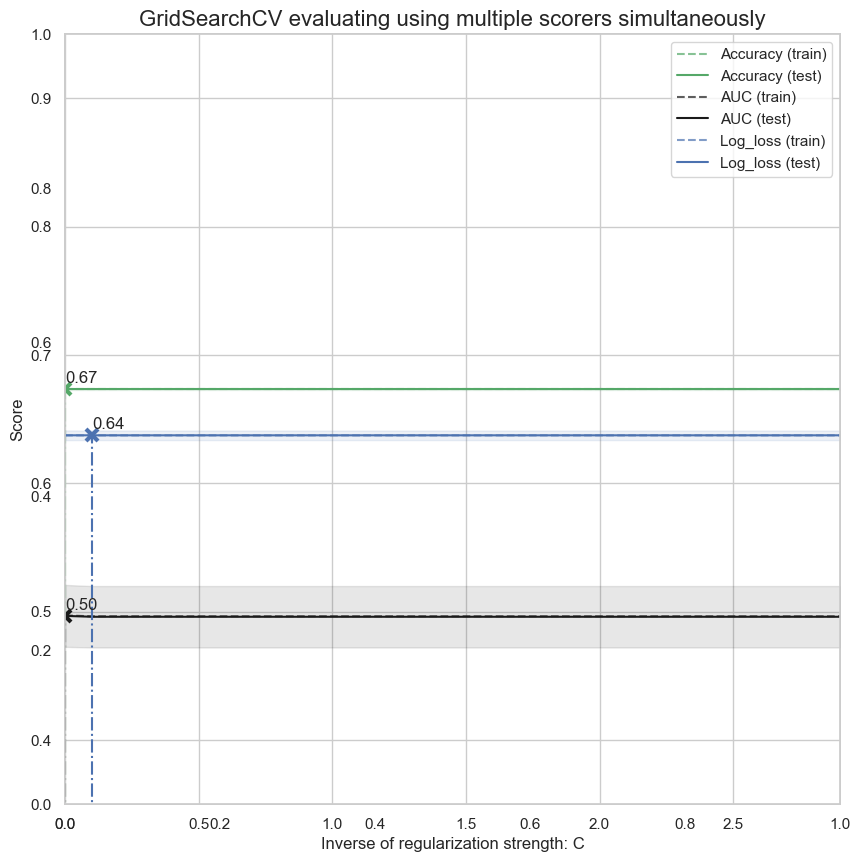

In [144]:
from sklearn.model_selection import GridSearchCV

X = final_health[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()


best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=1e-05))])
best params: {'clf__C': 1e-05}
best score: 0.6733000000000001


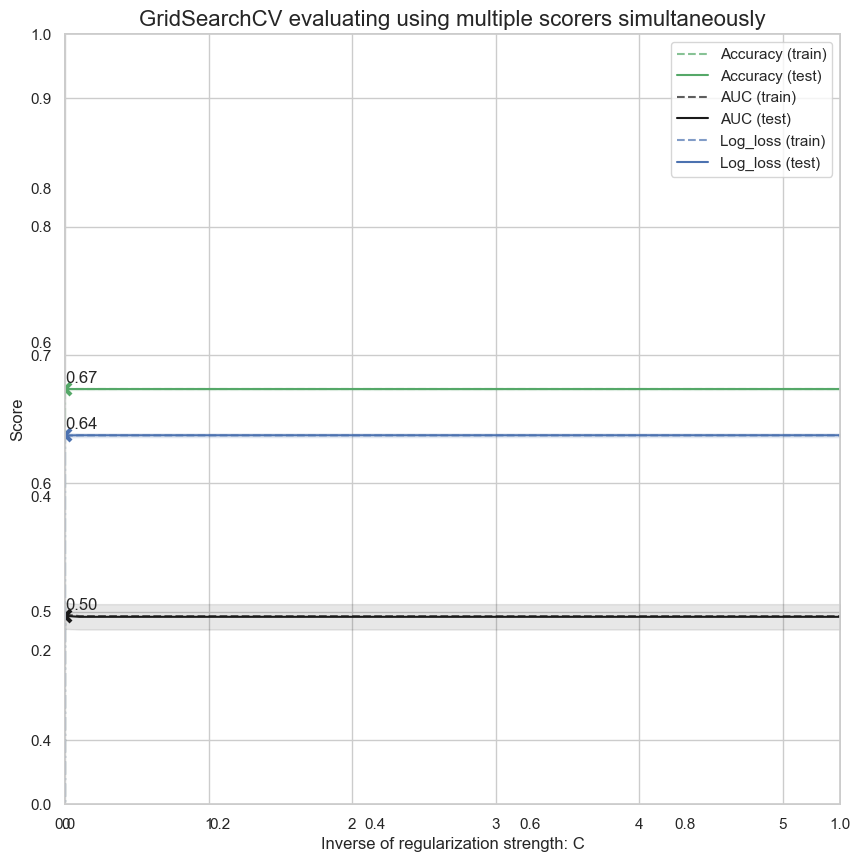

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [154]:
print(log_clf.predict(final_health[Selected_features]))
print(final_health['Name'].value_counts())

[0 0 0 ... 0 0 0]
Michael Johnson        7
James Johnson          6
Michael Miller         4
Michelle Williams      4
Scott Smith            4
                      ..
Sharon Rose            1
Stephanie Knox         1
Anthony Jones          1
Melissa Perkins DVM    1
Eric King              1
Name: Name, Length: 9378, dtype: int64
